# Assignment A1a: Jupyter Notebooks
Ryan Lin

## 1a) Markdown and Latex

### Univariate Normal Probability Distribution Functions

A **Univariate Normal Distrubution**, also called a Gaussian Distribution, is a continuous probability distribution characterized by two parameters, the **mean** $\mu$ and **variance** $\sigma^2$. 

A random variable $X$ with a distribution $\mathcal{N}(\mu, \sigma^2)$ has the Probability Density Function of:

$$
f_X(x) = \frac{1}{\sqrt{2\pi} \sigma} \space exp \space (- \frac{(x-\mu)^2}{2\sigma^2}) 
$$

where the variables:
- $\mu$ $\in \mathbb{R}$ is the **Mean** *~ The central location of the distribution.* 
- $\sigma$ $> 0$ is the **Standard Deviation** *~ The spread of the distribution.*
- $x$ *~ takes values in $\mathbb{R}$*



## 1b) Joint Probability of Independent Random Variables

The **independence** of random variables $ X_i $ and $ X_j $ means that knowing the outcome of one does not affect the probability distribution of the other. Formally, for independent variables:

$$
Pr[X_i \in A \land X_j \in B] = Pr[X_i \in A] \cdot Pr[X_j \in B]
$$

When there are $ N $ **mutually independent** variables, the **joint probability distribution** can be written as the product of the individual distributions.

### **Continuous Random Variables** with *Probability Density Functions $ f_X $*  
For a set of $ N $ independent continuous random variables, the joint probability density function (PDF) is given by:

$$
f_{X_1, ... , X_N } (x_1, ..., x_N) = \prod_{i=1}^{N} f_{X_i}(x_i)
$$

### **Discrete Random Variables** with *Probability Mass Functions $ p_X $*  
Similarly, for independent discrete random variables, the joint probability mass function (PMF) is:

$$
p_{X_1, ... , X_N } (x_1, ..., x_N) = \prod_{i=1}^{N} p_{X_i}(x_i)
$$

### **Application to the Normal Distribution**  
Now, consider the case where each $ X_i $ follows a **univariate normal distribution** with mean $ \mu $ and standard deviation $ \sigma $. The probability density function (PDF) for a single variable is:

$$
p(x_i | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{- \frac{(x_i - \mu)^2}{2\sigma^2}}
$$

Since the variables are independent, their joint probability is the product of individual normal PDFs:

$$
p(x_{1:N} | \mu, \sigma) = \prod_{i=1}^{N} p(x_i | \mu, \sigma)
$$

Substituting the normal PDF:

$$
p(x_{1:N} | \mu, \sigma) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} e^{- \frac{(x_i - \mu)^2}{2\sigma^2}}
$$

We can split this into two terms:

$$
p(x_{1:N} | \mu, \sigma) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \prod_{i=1}^{N} e^{- \frac{(x_i - \mu)^2}{2\sigma^2}}
$$

The first term simplifies since it is a product of constants:

$$
\prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} = \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^N
$$

Leaving us with:

$$
p(x_{1:N} | \mu, \sigma) = \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^N \cdot \prod_{i=1}^{N} e^{- \frac{(x_i - \mu)^2}{2\sigma^2}}
$$

The second term can be combined into the exponent:

$$
\prod_{i=1}^{N} e^{- \frac{(x_i - \mu)^2}{2\sigma^2}} = e^{- \sum_{i=1}^{N} \frac{(x_i - \mu)^2}{2\sigma^2}}
$$

Thus, the final form of the **joint probability density function** for $ N $ independent normal variables is:

$$
p(x_{1:N} | \mu, \sigma) = \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^N e^{- \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

This result is fundamental in statistics and probability, as it describes the likelihood of observing a set of independent normally distributed values given the parameters $ \mu $ and $ \sigma $.


## 2) Simple Function and Plotting

In [2]:
g(x=1, mu = 0, sigma = 1)

np.float64(0.24197072451914337)

In [7]:
g(x=-2, mu = -1, sigma = .5)

np.float64(0.10798193302637613)

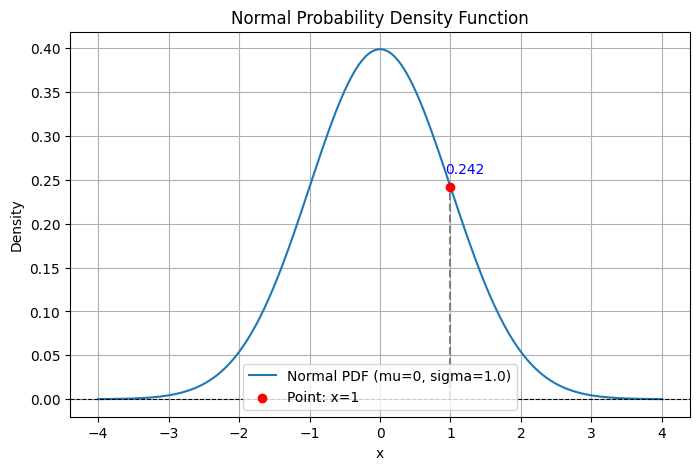

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the normal distribution PDF
def plot_normal_pdf(mu=0, sigma=1.0, x_range=None, point=None):
    """
    Plots the normal PDF with overlays for a given point and annotation.
    
    Parameters:
        mu (float): Mean of the normal distribution.
        sigma (float): Standard deviation of the normal distribution.
        x_range (tuple): Range for x-axis relative to the mean (default: mu ± 4sigma).
        point (float): Specific x-coordinate to annotate on the plot.
    """
    if x_range is None:
        x_range = (mu - 4 * sigma, mu + 4 * sigma)  # Default range: mean ± 4sigma
    
    # Generate x values and compute the PDF
    x_values = np.linspace(x_range[0], x_range[1], 500)
    y_values = g(x_values, mu=mu, sigma=sigma)
    
    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, label=f"Normal PDF (mu={mu}, sigma={sigma})")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Normal Probability Density Function")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Add x-axis
    
    # Add point and annotation if specified
    if point is not None:
        point_likelihood = g(point, mu=mu, sigma=sigma)
        plt.scatter([point], [point_likelihood], color="red", zorder=5, label=f"Point: x={point}")
        plt.plot([point, point], [0, point_likelihood], color="gray", linestyle="--", zorder=4)
        plt.annotate(
            f"{point_likelihood:.3f}",
            (point, point_likelihood),
            textcoords="offset points",
            xytext=(10, 10),
            ha="center",
            color="blue"
        )
    
    plt.legend()
    plt.grid(True)
    plt.show()

plot_normal_pdf(mu=0, sigma=1.0, point=1)  



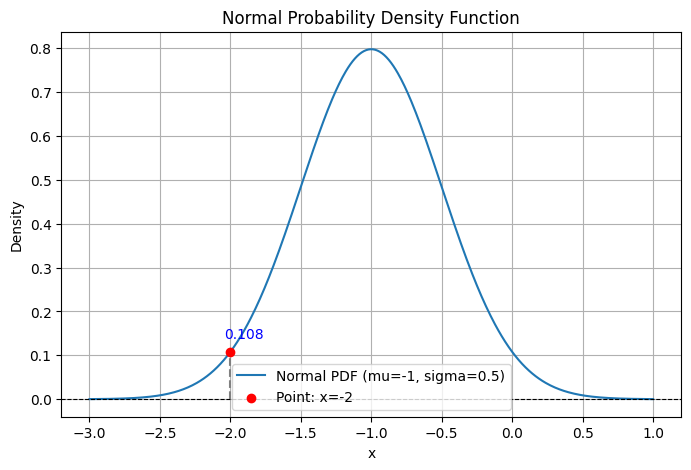

In [11]:
plot_normal_pdf(mu=-1,sigma=.5,point=-2)